## Starters

In [80]:
import matplotlib.pyplot as plt
import numpy as np

In [81]:
# Variable parameters

NA = 10**15 # in /cm^3

t_ox = 2*1e-5 # in cm

V_FB = -1.608 #in V

q = 1.60217663*1e-19 # in C

W = 2.44 * 1e-4 # in cm

L = 4  * 1e-4 # in cm

V_BS = 0 # in V

In [82]:
# Constants

ni = 10**10 # in /cm^3

epsilon_ox = 3.9*8.854*1e-14 # in F/cm  # sio2

epsilon_s = 11.9*8.854*1e-14 # in F/cm  # si

mu_n  = 385 # in cm^2/(V.s)

In [83]:
epsilon_ox

3.4530599999999993e-13

In [84]:
500*0.35*0.22/(0.8)*1e-8

4.8125e-07

In [85]:

C_ox = epsilon_ox/t_ox # in F/cm^2

phi_B = 0.0258*np.log(NA/ni) # no units

V_th = V_FB + 2*phi_B + np.sqrt(2*q*NA*epsilon_s*(2*phi_B-V_BS))/C_ox # in V

gamma = np.sqrt(2*epsilon_s*q*NA)/C_ox

alpha = 1 + gamma/(2*np.sqrt(2*phi_B-V_BS))

In [86]:
C_ox

1.7265299999999996e-08

In [87]:
V_th

-0.19366271783456745

In [456]:
mu_n*C_ox*W/L

4.054755704999999e-06

## Extracted Data analysis

In [399]:
# Extracted Data
v_DS = np.array([0.014723405259370246, 0.09598527659474064, 0.15714403690289397, 0.24024633389568564, 0.3304271911093284, 0.4091407807651924, 0.5078159102438564, 0.5549591213147246, 0.636645706263346, 0.7392848294656867, 0.8335712516074231, 0.924601536047568, 1.0211530974599767, 1.1229427934358152, 1.212982079445041, 1.2897136722390667, 1.4142963321260458, 1.5557259653386502, 1.6614796550381654, 1.7619952101742506, 1.8977619952101743, 2.0486768991187194, 2.177648266342626, 2.327713743024669, 2.4961834762809247, 2.6609723582223377, 2.8804077250687214, 3.0784658400481346, 3.272701532508288, 3.508417587862629, 3.763245755813268, 3.98084069700223])
i_D = [0.2849202456853266, 2.9145939886498984, 5.586305144912305, 8.229057194236203, 10.927859127957214, 13.767719937410963, 16.704733879819706, 19.297975197926153, 22.042551203904807, 24.428407949741935, 27.135617366122514, 29.76715943856699, 32.42579228847007, 35.29648053434223, 37.680468950699456, 40.50538312431397, 43.38167635862584, 46.47282748312665, 49.07167378967281, 51.655573460379735, 54.41509610219762, 57.43618487120203, 60.31995142343352, 62.98138676755646, 65.68859618393704, 68.48455125061304, 71.67659216702866, 74.33709334641163, 76.69025432635046, 79.27415399705738, 81.75436138162965, 83.84502206964197]

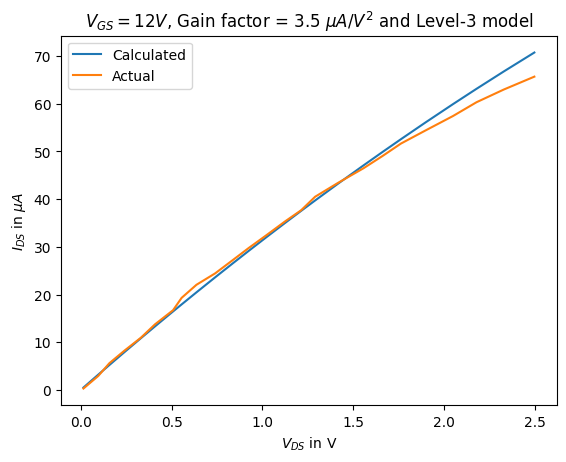

In [404]:
v_d_12 = v_DS[:25]
i_d_12 = np.array(i_D[:25])
gain=3.5
v_GS = 12
v_dsat = (v_GS -2.45)/alpha
i_d_cal_12 = gain*(12-2.45)*(v_d_12 - (v_d_12**2)/(2*v_dsat))
plt.plot(v_d_12,i_d_cal_12,label = 'Calculated')
plt.plot(v_d_12,i_d_12, label = 'Actual')
plt.xlabel("$V_{DS} $ in V")
plt.ylabel("$I_{DS}$ in $\mu A$")
plt.title("$V_{GS} = 12V$"+f", Gain factor = {gain} $\mu A/V^2$ and Level-3 model")
plt.legend()
plt.savefig(f'Report/images/Ids-comp-12-{gain}.png')
plt.show()

In [112]:
gain=3.5
V_GS = 12
V_Dsat = (V_GS - V_th )/alpha
i_D_cal = gain*(12-2.45)*(v_DS - (v_DS**2)/(2*V_Dsat))

NameError: name 'v_DS' is not defined

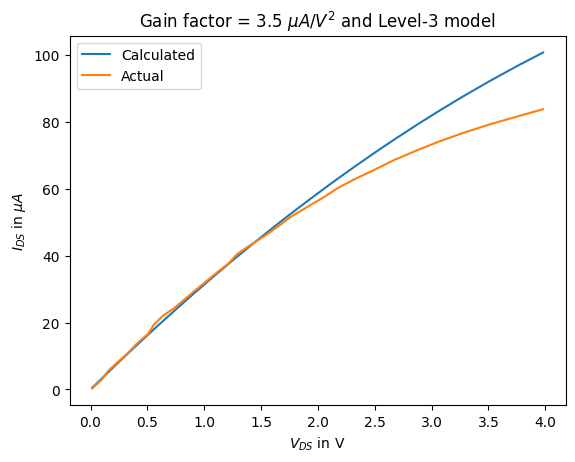

In [398]:
plt.plot(v_DS,i_D_cal,label = 'Calculated')
plt.plot(v_DS,i_D, label = 'Actual')
plt.xlabel("$V_{DS} $ in V")
plt.ylabel("$I_{DS}$ in $\mu A$")
plt.title(f"Gain factor = {gain} $\mu A/V^2$ and Level-3 model")
plt.legend()
plt.savefig(f'Report/images/Ids-comp-{gain}.png')
plt.show()


In [384]:
# V_GS = 10V
v_d_10 = np.array([0.005662848176680863, 0.0996661279095832, 0.21858593961988135, 0.31046565128652837, 0.38535681842313274, 0.4572749902669797, 0.5402357160553544, 0.6197987329377205, 0.6863371990137207, 0.8172905630994657, 0.9084624187440276, 1.0214362398688108, 1.134693203402428, 1.2567275816099006, 1.3924943666458243, 1.5320835742010077, 1.7040925875676889, 1.8551490626806508, 2.0363602043344384, 2.2004412302537664, 2.3789625190236308, 2.5866474759034013])
i_d_10 = np.array([0.06352320231672855, 2.4792732198323173, 4.583946378943927, 6.431724234568766, 8.851210911044163, 11.238001821621243, 13.48466802120554, 15.618300287255657, 18.320838879936478, 21.190592961068685, 23.549358929447205, 26.311684065484947, 28.656437562764193, 31.177748195894345, 33.480464279875754, 36.14470211821855, 39.13496345080455, 41.64132744809547, 44.12713982110745, 46.58025642822111, 48.721362012190845, 51.20437189098297])

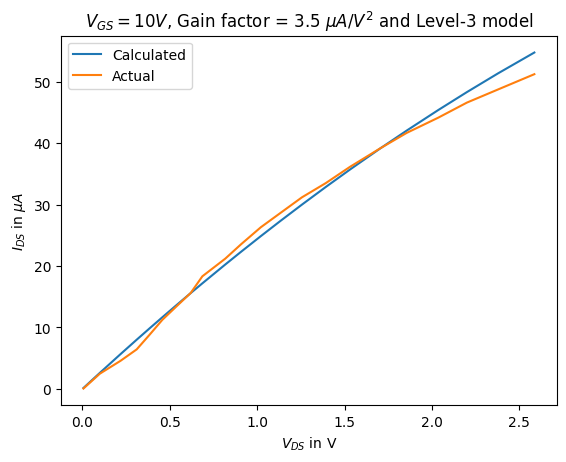

In [406]:
gain=3.5
v_GS = 10
v_dsat = (v_GS -2.45)/alpha
i_d_cal_10 = gain*(10-2.45)*(v_d_10 - (v_d_10**2)/(2*v_dsat))
plt.plot(v_d_10,i_d_cal_10,label = 'Calculated')
plt.plot(v_d_10,i_d_10, label = 'Actual')
plt.xlabel("$V_{DS} $ in V")
plt.ylabel("$I_{DS}$ in $\mu A$")
plt.title("$V_{GS} = 10V$"+f", Gain factor = {gain} $\mu A/V^2$ and Level-3 model")
plt.legend()
plt.savefig(f'Report/images/Ids-comp-10-{gain}.png')
plt.show()


## Full Data Extraction

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
V_DS_12 = np.array([0.0031547183613752743, 0.06954096561814191, 0.12783467446964156, 0.17529261155815654, 0.24250182882223847, 0.30875091441111924, 0.3728054133138259, 0.4453639356254572, 0.5260149963423555, 0.5876005852231163, 0.6548098024871982, 0.7122805413313825, 0.7973207754206291, 0.8790691294806144, 0.9488844184345281, 1.0321415508412581, 1.112381126554499, 1.1971470373079736, 1.2828730797366494, 1.3699707388441842, 1.4629663496708118, 1.5491038771031456, 1.644705559619605, 1.7289228237015362, 1.832205559619605, 1.9180687637161666, 2.0304041697147035, 2.140956474030724, 2.2530175566934894, 2.3525969275786394, 2.4667154352596925, 2.5783650329188, 2.7181327724945135, 2.848573518653987, 2.996159473299195, 3.1512893196781273, 3.323838697878566, 3.4658010241404535, 3.668937454279444, 3.865078639356254, 4.067666422823701, 4.300018288222384, 4.552532918800292, 4.811905632772494, 5.063185808339429, 5.352459765910753, 5.646534381858083, 5.961046086320409, 6.271031455742501, 6.595830285296269, 6.884281272860278, 7.170674835405998, 7.4646122896854425, 7.783787490855889, 8.126143013899048, 8.456016825164594, 8.793297366495976, 9.120702267739576, 9.493782004389173, 9.810625457205559, 10.169166057059254, 10.46735552304316, 10.77240307242136, 11.051389904901242, 11.319678127286027, 11.597156181419166, 11.917291514264813])
I_DS_12 = np.array([-0.025331724969843185, 2.086248492159228, 4.420386007237636, 6.627864897466828, 8.810012062726177, 11.130579010856453, 13.329010856453559, 15.365500603136308, 17.9167671893848, 20.169481302774425, 22.498190591073584, 24.580820265379977, 26.891435464414958, 29.197527141133897, 31.233112183353438, 33.50934861278649, 36.02804583835947, 38.07086851628468, 40.482810615199035, 42.647768395657415, 44.92852834740651, 46.917068757539205, 48.968938480096504, 51.136610373944514, 53.22104945717732, 55.21501809408927, 57.449638118214715, 59.32780458383595, 61.28739445114596, 63.39445114595899, 65.26176115802171, 67.2910132689988, 69.24698431845597, 71.23823884197829, 73.33534378769602, 75.22889022919179, 77.1568154402895, 78.97346200241255, 80.77382388419782, 82.54433051869722, 84.37726176115802, 86.09167671893847, 87.86218335343787, 89.34680337756333, 90.84499396863691, 92.15229191797346, 93.30850422195417, 94.55880579010856, 95.67249698431846, 96.63238841978287, 97.4900482509047, 98.27985524728588, 99.0732810615199, 99.93184559710494, 100.71351025331725, 101.55579010856454, 102.24155609167671, 103.00512665862485, 103.73793727382389, 104.33775633293124, 105.02352231604343, 105.68395657418577, 106.11278648974668, 106.61127864897466, 107.1251507840772, 107.58112183353438, 108.125753920386])

V_DS_10 = np.array([0.03305596196049744, 0.0718727139722019, 0.13153803950256035, 0.22988295537673736, 0.28927395757132407, 0.34935076810534016, 0.41011338697878563, 0.49282187271397215, 0.5615398683247989, 0.6408193123628383, 0.6822421360643744, 0.7383412582297, 0.8167977322604243, 0.9084217264081931, 0.9720647403072421, 1.053127286027798, 1.1044257498171177, 1.1907004389173372, 1.2990581565471835, 1.36078090709583, 1.429498902706657, 1.5220830285296267, 1.6024597659107533, 1.6936722750548645, 1.7981894659839062, 1.9109363569861009, 2.0020117044623262, 2.1264173372348205, 2.257818215069495, 2.353831382589612, 2.498948427212875, 2.6383046817849305, 2.7617501828822237, 2.897814557425018, 3.049515362106803, 3.225493782004389, 3.362106803218727, 3.538222384784199, 3.7286027798098025, 3.9357168983174833, 4.127743233357718, 4.356391733723481, 4.569678127286028, 4.7851591075347475, 4.99789685442575, 5.233129114850036, 5.464109363569861, 5.67328090709583, 5.900969275786394, 6.12289685442575, 6.359912216532552, 6.596927578639356, 6.849305047549378, 7.103054133138259, 7.3433613752743225, 7.637161667885881, 7.944678127286028, 8.227779809802486, 8.548326627651791, 8.846516093635698, 9.143608266276518, 9.48390636430139, 9.769888441843452, 10.044897585954645, 10.334171543525969, 10.638944769568397, 10.909016093635698, 11.184436722750547, 11.459034381858082, 11.721836137527431, 12.015499268471103])
I_DS_10 = np.array([0.18727382388419783, 1.8184559710494572, 3.2406513872135103, 5.4037997587454765, 7.179734620024125, 9.236127864897467, 11.190289505428227, 13.139927623642944, 14.894149577804583, 16.62213510253317, 18.221652593486127, 20.059107358262967, 21.88841978287093, 23.610977080820266, 25.261158021712905, 26.905910735826296, 28.577804583835945, 30.227985524728588, 31.813027744270205, 33.38449939686369, 34.97587454764777, 36.424306393244876, 37.997587454764776, 39.54825090470446, 41.0934861278649, 42.59439083232811, 44.04644149577805, 45.71562123039807, 47.23552472858866, 48.7192400482509, 50.18214716525935, 51.67129071170084, 53.00844390832328, 54.28045838359469, 55.5624246079614, 56.824487334137515, 58.040410132689985, 59.28709288299156, 60.451447527141134, 61.41224366706876, 62.49336550060313, 63.43697225572979, 64.32539203860073, 65.12243667068758, 65.9583835946924, 66.57810615199035, 67.28648974668275, 67.80307599517491, 68.26537997587455, 69.08685162846804, 69.5301568154403, 70.11188178528347, 70.58685162846804, 71.12243667068758, 71.69240048250904, 72.30850422195417, 72.78890229191798, 73.31905910735826, 73.69179734620025, 74.27623642943306, 74.80367913148372, 75.32931242460796, 75.8648974668275, 76.22135102533173, 76.7388419782871, 77.1767189384801, 77.66254523522316, 78.09047044632086, 78.55910735826296, 79.03588661037395, 79.56966224366707])

V_DS_8 = np.array([0.019065471836137528, 0.11946781272860277, 0.1887344550109729, 0.30052121433796636, 0.3837783467446964, 0.46182333577176293, 0.5619513533284565, 0.6535753474762253, 0.7489027066569129, 0.8535570592538405, 0.9553310168251645, 1.0764447695683979, 1.2018105340160936, 1.3373262618873445, 1.4843635698610094, 1.637710314557425, 1.8023043160204828, 1.9590801024140452, 2.137801755669349, 2.3534198975859546, 2.5709583028529623, 2.791788588149232, 3.0039776883686904, 3.222201901975128, 3.448518653986832, 3.666194220921726, 3.9081474030724213, 4.151060716898317, 4.413999634235552, 4.675292611558156, 4.943032187271397, 5.219412948061448, 5.464932333577176, 5.757361009509875, 6.046360643745428, 6.331519751280175, 6.647677395757132, 6.951216166788588, 7.2317117776152156, 7.543205925384052, 7.836320409656181, 8.157004389173371, 8.483860643745427, 8.790279809802486, 9.153072421360644, 9.446735552304315, 9.737929773226043, 10.037216532553035, 10.341303950256034, 10.622759692757864, 10.894476956839794, 11.188140087783466, 11.462874908558888, 11.734592172640818, 11.979837234820774])
I_DS_8 = np.array([0.6242460796139928, 2.6598311218335344, 4.530759951749095, 6.3347406513872135, 8.13329312424608, 9.580820265379975, 11.300663449939686, 13.205066344993968, 14.89686369119421, 16.67279855247286, 18.35283474065139, 20.123341375150783, 21.83142340168878, 23.472557297949336, 25.2810615199035, 27.04071170084439, 28.688178528347407, 30.303075995174908, 31.697225572979495, 33.20446320868516, 34.69903498190591, 35.95928829915561, 36.966224366706875, 37.80398069963812, 38.6978287092883, 39.54372738238842, 40.2294933655006, 40.84740651387214, 41.55669481302775, 42.05518697225573, 42.63148371531966, 43.132689987937276, 43.58866103739445, 44.09439083232811, 44.584740651387214, 45.10313630880579, 45.45416164053076, 45.91194209891435, 46.325392038600725, 46.86911942098914, 47.17671893848009, 47.63359469240048, 47.9891435464415, 48.448733413751505, 48.79523522316043, 49.208685162846805, 49.642943305186975, 49.89716525934861, 50.185765983112184, 50.60916767189385, 50.9583835946924, 51.3962605548854, 51.82147165259349, 52.207780458383596, 52.43124246079614])

V_DS_6 = np.array([0.050338332114118506, 0.12358266276517922, 0.19353511338697876, 0.2932516459400146, 0.39379114850036573, 0.5192940746159473, 0.6500091441111924, 0.7956748354059985, 0.9498445501097292, 1.0949615947329918, 1.2768379663496707, 1.4573427212874908, 1.6565014630577908, 1.8674561082662764, 2.0882863935625458, 2.3152889539136794, 2.5398226042428673, 2.7884967081199705, 3.0463606437454276, 3.311219824433065, 3.5745702267739574, 3.8466989758595465, 4.123491221653255, 4.361329553767374, 4.617684711046086, 4.88130943672275, 5.118324798829553, 5.40019202633504, 5.639676298463789, 5.85378566203365, 6.085863204096562, 6.358952084857352, 6.60776335040234, 6.852596927578639, 7.113478419897586, 7.37312545720556, 7.649506217995611, 7.899551938551572, 8.136155815654718, 8.379754937820044, 8.643791148500366, 8.881355157278712, 9.132635332845647, 9.384464155084125, 9.63039502560351, 9.868507681053401, 10.123079736649597, 10.368873445501096, 10.620016459400146, 10.866495976591075, 11.123125457205559, 11.365764447695684, 11.609226408193123, 11.863249817117776])
I_DS_6 = np.array([-0.3410735826296743, 1.1019300361881785, 2.5738841978287095, 3.9725572979493364, 5.409227985524729, 6.8124246079613995, 8.15319662243667, 9.622436670687575, 11.02291917973462, 12.194511459589867, 13.419481302774427, 14.534981905910735, 15.630579010856453, 16.61761158021713, 17.534077201447527, 18.2813630880579, 18.84680337756333, 19.379674306393245, 19.951447527141134, 20.337756332931242, 20.73130277442702, 21.15289505428227, 21.476779252110976, 21.88027744270205, 22.10826296743064, 22.324487334137515, 22.61851628468034, 22.929734620024124, 23.192098914354645, 23.430940892641736, 23.594692400482508, 23.90319662243667, 24.032569360675513, 24.154704463208684, 24.33745476477684, 24.610675512665864, 24.799758745476478, 25.070265379975876, 25.311821471652593, 25.522617611580216, 25.7189384800965, 25.946019300361883, 26.145054282267793, 26.239143546441497, 26.496984318455972, 26.665259348612786, 26.91043425814234, 27.02171290711701, 27.237032569360675, 27.47587454764777, 27.857659831121833, 28.084740651387214, 28.34620024125452, 28.721652593486127])

V_DS_4 = np.array([-0.02606071689831748, 0.1333211411850768, 0.3267190929041697, 0.556739209948793, 0.8150146305779078, 1.0690380395025603, 1.3374634235552303, 1.602871250914411, 1.8612838332114117, 2.117638990490124, 2.378383321141185, 2.671497805413314, 2.930596196049744, 3.189420263350402, 3.4509875640087784, 3.7205102414045355, 3.9964795171909286, 4.251463057790782, 4.503840526700804, 4.742090343818581, 4.987198244330651, 5.238615581565472, 5.488249817117776, 5.723482077542062, 5.955833942940746, 6.198061448427213, 6.440014630577908, 6.6912948061448425, 6.935854059985369, 7.174789685442574, 7.433065106071689, 7.676115581565472, 7.94659839063643, 8.184436722750549, 8.447787125091441, 8.687682882223847, 8.931693489392831, 9.206976956839794, 9.47691111923921, 9.713240673006583, 9.955193855157278, 10.205102414045355, 10.462417702999268, 10.749222750548647, 11.068260790051207, 11.343269934162398, 11.595784564740306, 11.896580102414045])
I_DS_4 = np.array([-0.05971049457177322, 0.7753317249698432, 2.029252110977081, 3.1248492159227985, 3.896562123039807, 4.608564535585042, 5.143244873341375, 5.531363088057901, 5.982810615199035, 6.123039806996381, 6.305790108564535, 6.439686369119421, 6.667671893848009, 6.7898069963811825, 6.7898069963811825, 6.99065138721351, 7.056694813027744, 7.181544028950543, 7.2439686369119425, 7.401387213510254, 7.415862484921592, 7.371531966224366, 7.466525934861279, 7.633896260554885, 7.747889022919179, 7.747889022919179, 7.936972255729795, 8.056393244873341, 8.223763570566948, 8.240952955367913, 8.253618817852836, 8.458986731001206, 8.591978287092884, 8.700542822677924, 8.700542822677924, 8.808202653799759, 8.78015681544029, 8.913148371531966, 8.913148371531966, 9.046139927623642, 9.106755126658625, 9.244270205066345, 9.354644149577805, 9.57177322074789, 9.753618817852834, 9.81151990349819, 9.925512665862485, 10.129071170084439])

In [66]:
vds12= [i for i in V_DS_12 if i<4.5]
vds10= [i for i in V_DS_10 if i<3.5]
vds8 = [i for i in V_DS_8 if i<2.5]
vds6 = [i for i in V_DS_6 if i<1.5]
vds4 = [i for i in V_DS_4 if i<1.5]
ids12 = list(I_DS_12[:len(vds12)])
ids10 =list(I_DS_10[:len(vds10)])
ids8 = list(I_DS_8[:len(vds8)])
ids6 = list(I_DS_6[:len(vds6)])
ids4 = list(I_DS_4[:len(vds4)])
vgs12 = list(np.ones(len(vds12))*12)
vgs10 = list(np.ones(len(vds10))*10)
vgs8 = list(np.ones(len(vds8))*8)
vgs6 = list(np.ones(len(vds6))*6)
vgs4 = list(np.ones(len(vds4))*4)

In [67]:
vds = vds12+vds10+vds8+vds6+vds4
ids = ids12+ids10+ids8+ids6+ids4
vgs = vgs12+vgs10+vgs8+vgs6+vgs4

In [69]:
vgs

[12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0]

In [30]:

import pandas as pd

df = pd.DataFrame({"VDS" : V_DS_6, "IDS" : I_DS_6*1e-6})
df.to_csv("data-6V.csv", index=False)

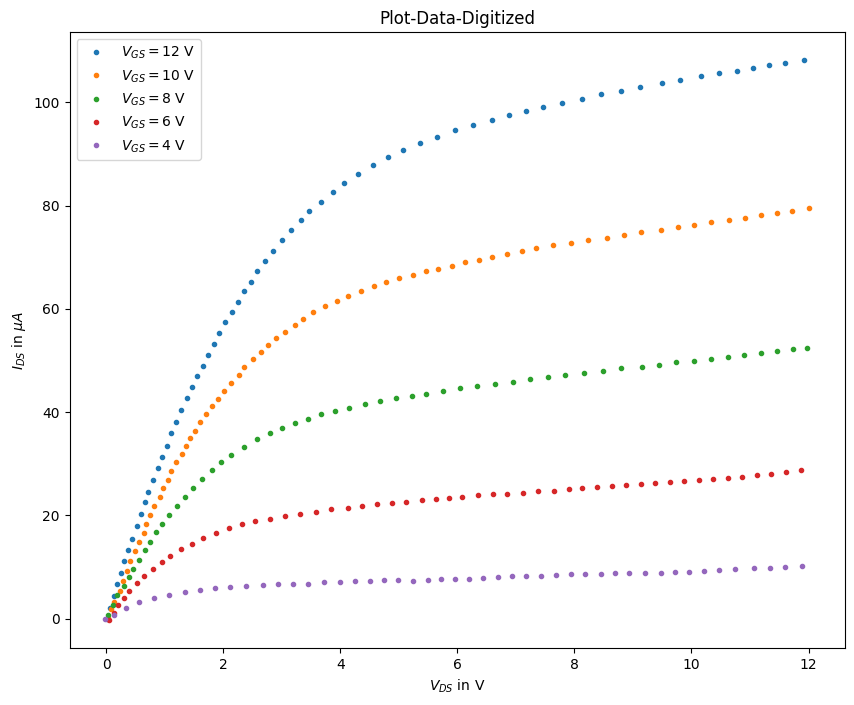

In [23]:
plt.figure(figsize=(10,8))
plt.xlabel("$V_{DS}$ in V")
plt.ylabel("$I_{DS}$ in $\mu A$")
plt.plot(V_DS_12,I_DS_12,'.',label='$V_{GS} = 12$ V')
plt.plot(V_DS_10,I_DS_10,'.',label='$V_{GS} = 10$ V')
plt.plot(V_DS_8,I_DS_8,'.',label='$V_{GS} = 8$ V')
plt.plot(V_DS_6,I_DS_6,'.',label='$V_{GS} = 6$ V')
plt.plot(V_DS_4,I_DS_4,'.',label='$V_{GS} = 4$ V')
plt.title('Plot-Data-Digitized')
plt.savefig('Report/images/Plot-Data-Digitized.png')
plt.legend()
plt.show()

In [24]:
ni = 10**10 # in /cm^3

epsilon_ox = 3.9*8.854*1e-14 # in F/cm  # sio2

epsilon_s = 11.9*8.854*1e-14 # in F/cm  # si

mu_n  = 385 # in cm^2/(V.s)

NA = 10**15 # in /cm^3

t_ox = 2*1e-5 # in cm

# V_FB = -1.608 #in V

q = 1.60217663*1e-19 # in C

W = 2.44 * 1e-4 # in cm

L = 4  * 1e-4 # in cm

V_BS = 0 # in V

C_ox = epsilon_ox/t_ox # in F/cm^2

phi_B = 0.0258*np.log(NA/ni) # no units

# V_th = V_FB + 2*phi_B + np.sqrt(2*q*NA*epsilon_s*(2*phi_B-V_BS))/C_ox # in V

gamma = np.sqrt(2*epsilon_s*q*NA)/C_ox

alpha = 1 + gamma/(2*np.sqrt(2*phi_B-V_BS))

delta = 1e-6

In [25]:
def model(V_GS,V_DS):
    V_DSat = ((V_GS-Vth)/alpha)*np.ones(np.size(V_DS))
    V_DSeff = np.ones(np.size(V_DS))
    for i in range(np.size(V_DS)):
        if V_DSat[i]>V_DS[i]:
            V_DSeff[i] = V_DS[i]
        else:
            V_DSeff[i] = V_DSat[i]
    I_DS = beta*alpha*(V_DSat*V_DSeff - V_DSeff**2/2)*(1+lamb*(V_DS))
    return I_DS
def model1(V_GS,V_DS,IDS,R1):
    IDS = IDS*1e-6
    V_DSat = ((V_GS-Vth1)/alpha1)*np.ones(np.size(V_DS))
    #print(V_DSat)
    #print()
    V_DSeff = np.ones(np.size(V_DS))
    for i in range(np.size(V_DS)):
        if V_DSat[i]>V_DS[i]-2*IDS[i]*R1:
            V_DSeff[i] = V_DS[i]-2*IDS[i]*R1
        else:
            V_DSeff[i] = V_DSat[i]
    #print(V_DSeff)
    I_DS = beta1*alpha1*(V_DSat*V_DSeff - V_DSeff**2/2)*(1+lamb*(V_DS-2*IDS*R1))
    #I_DS_p = gainFactor*(V_DSeff - V_DSeff**2/(2*V_DSat))*(V_GS-)*(1+lamb*V_DS)
    return I_DS
    

In [26]:
# Model Parameters1

(alpha,beta,Vth,lamb) = (2.56646,2.77606,0.112946,0.040586)


alpha1 = 2.0836
beta1  = 2.21585
Vth1   = -0.00813274 
lamb1 = 0.0366062
R1 = -4258.57

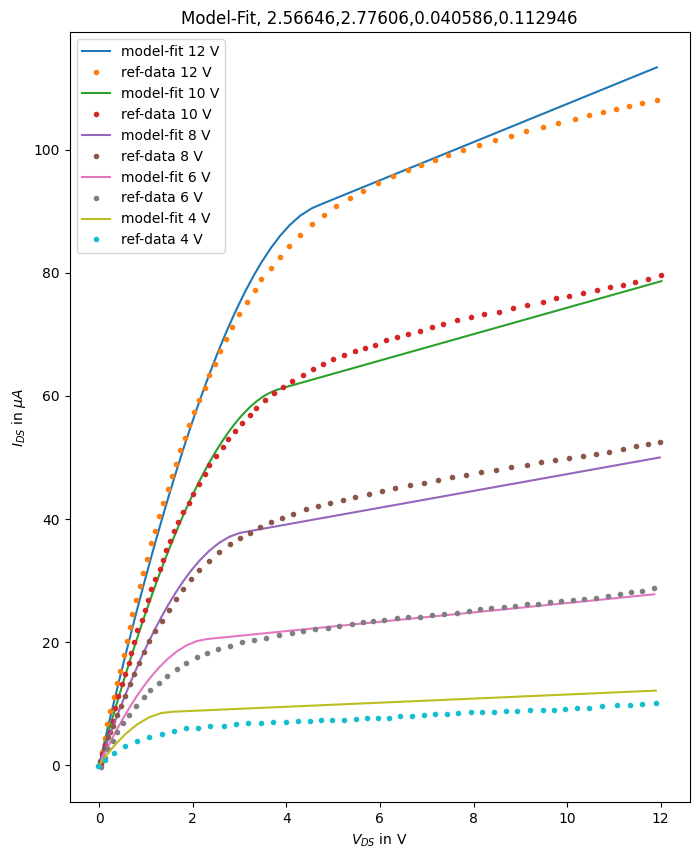

In [27]:
I_DS_12_Cal = model(12,V_DS_12)
I_DS_10_Cal = model(10,V_DS_10)
I_DS_8_Cal = model(8,V_DS_8)
I_DS_6_Cal = model(6,V_DS_6)
I_DS_4_Cal = model(4,V_DS_4)

plt.figure(figsize=(8,10))
plt.xlabel("$V_{DS}$ in V")
plt.ylabel("$I_{DS}$ in $\mu A$")
plt.title(f'Model-Fit, {alpha},{beta},{lamb},{Vth}')

plt.plot(V_DS_12,I_DS_12_Cal,label = 'model-fit 12 V')
plt.plot(V_DS_12,I_DS_12,'.',label = 'ref-data 12 V')
plt.plot(V_DS_10,I_DS_10_Cal,label = 'model-fit 10 V')
plt.plot(V_DS_10,I_DS_10,'.',label = 'ref-data 10 V')
plt.plot(V_DS_8,I_DS_8_Cal,label = 'model-fit 8 V')
plt.plot(V_DS_8,I_DS_8,'.',label = 'ref-data 8 V')
plt.plot(V_DS_6,I_DS_6_Cal,label = 'model-fit 6 V')
plt.plot(V_DS_6,I_DS_6,'.',label = 'ref-data 6 V')
plt.plot(V_DS_4,I_DS_4_Cal,label = 'model-fit 4 V')
plt.plot(V_DS_4,I_DS_4,'.',label = 'ref-data 4 V')

plt.legend()
plt.savefig(f'Report/images/model-with-resistor.png')


plt.show()

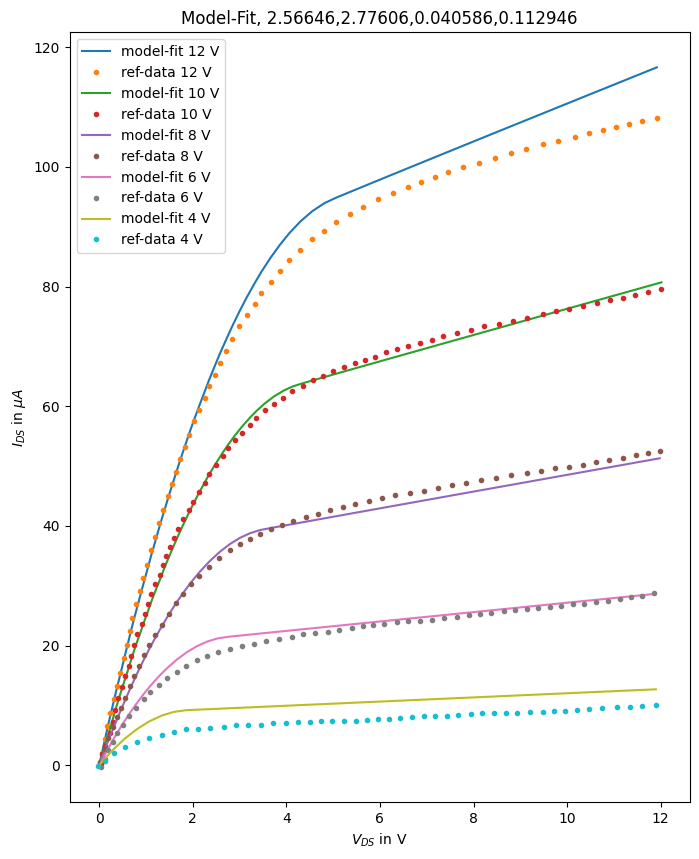

In [28]:

I_DS_12_Cal = model1(12,V_DS_12,I_DS_12,R1)
I_DS_10_Cal = model1(10,V_DS_10,I_DS_10,R1)
I_DS_8_Cal = model1(8,V_DS_8,I_DS_8,R1)
I_DS_6_Cal = model1(6,V_DS_6,I_DS_6,R1)
I_DS_4_Cal = model1(4,V_DS_4,I_DS_4,R1)

plt.figure(figsize=(8,10))
plt.xlabel("$V_{DS}$ in V")
plt.ylabel("$I_{DS}$ in $\mu A$")
plt.title(f'Model-Fit, {alpha},{beta},{lamb},{Vth}')

plt.plot(V_DS_12,I_DS_12_Cal,label = 'model-fit 12 V')
plt.plot(V_DS_12,I_DS_12,'.',label = 'ref-data 12 V')
plt.plot(V_DS_10,I_DS_10_Cal,label = 'model-fit 10 V')
plt.plot(V_DS_10,I_DS_10,'.',label = 'ref-data 10 V')
plt.plot(V_DS_8,I_DS_8_Cal,label = 'model-fit 8 V')
plt.plot(V_DS_8,I_DS_8,'.',label = 'ref-data 8 V')
plt.plot(V_DS_6,I_DS_6_Cal,label = 'model-fit 6 V')
plt.plot(V_DS_6,I_DS_6,'.',label = 'ref-data 6 V')
plt.plot(V_DS_4,I_DS_4_Cal,label = 'model-fit 4 V')
plt.plot(V_DS_4,I_DS_4,'.',label = 'ref-data 4 V')

plt.legend()
plt.savefig(f'Report/images/model-without-resis.png')


plt.show()

## Least Square Fitting

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
V_DS_12 = np.array([0.0031547183613752743, 0.06954096561814191, 0.12783467446964156, 0.17529261155815654, 0.24250182882223847, 0.30875091441111924, 0.3728054133138259, 0.4453639356254572, 0.5260149963423555, 0.5876005852231163, 0.6548098024871982, 0.7122805413313825, 0.7973207754206291, 0.8790691294806144, 0.9488844184345281, 1.0321415508412581, 1.112381126554499, 1.1971470373079736, 1.2828730797366494, 1.3699707388441842, 1.4629663496708118, 1.5491038771031456, 1.644705559619605, 1.7289228237015362, 1.832205559619605, 1.9180687637161666, 2.0304041697147035, 2.140956474030724, 2.2530175566934894, 2.3525969275786394, 2.4667154352596925, 2.5783650329188, 2.7181327724945135, 2.848573518653987, 2.996159473299195, 3.1512893196781273, 3.323838697878566, 3.4658010241404535, 3.668937454279444, 3.865078639356254, 4.067666422823701, 4.300018288222384, 4.552532918800292, 4.811905632772494, 5.063185808339429, 5.352459765910753, 5.646534381858083, 5.961046086320409, 6.271031455742501, 6.595830285296269, 6.884281272860278, 7.170674835405998, 7.4646122896854425, 7.783787490855889, 8.126143013899048, 8.456016825164594, 8.793297366495976, 9.120702267739576, 9.493782004389173, 9.810625457205559, 10.169166057059254, 10.46735552304316, 10.77240307242136, 11.051389904901242, 11.319678127286027, 11.597156181419166, 11.917291514264813])
I_DS_12 = np.array([-0.025331724969843185, 2.086248492159228, 4.420386007237636, 6.627864897466828, 8.810012062726177, 11.130579010856453, 13.329010856453559, 15.365500603136308, 17.9167671893848, 20.169481302774425, 22.498190591073584, 24.580820265379977, 26.891435464414958, 29.197527141133897, 31.233112183353438, 33.50934861278649, 36.02804583835947, 38.07086851628468, 40.482810615199035, 42.647768395657415, 44.92852834740651, 46.917068757539205, 48.968938480096504, 51.136610373944514, 53.22104945717732, 55.21501809408927, 57.449638118214715, 59.32780458383595, 61.28739445114596, 63.39445114595899, 65.26176115802171, 67.2910132689988, 69.24698431845597, 71.23823884197829, 73.33534378769602, 75.22889022919179, 77.1568154402895, 78.97346200241255, 80.77382388419782, 82.54433051869722, 84.37726176115802, 86.09167671893847, 87.86218335343787, 89.34680337756333, 90.84499396863691, 92.15229191797346, 93.30850422195417, 94.55880579010856, 95.67249698431846, 96.63238841978287, 97.4900482509047, 98.27985524728588, 99.0732810615199, 99.93184559710494, 100.71351025331725, 101.55579010856454, 102.24155609167671, 103.00512665862485, 103.73793727382389, 104.33775633293124, 105.02352231604343, 105.68395657418577, 106.11278648974668, 106.61127864897466, 107.1251507840772, 107.58112183353438, 108.125753920386])
V_GS_12 = np.ones(np.size(V_DS_12))*12

V_DS_10 = np.array([0.03305596196049744, 0.0718727139722019, 0.13153803950256035, 0.22988295537673736, 0.28927395757132407, 0.34935076810534016, 0.41011338697878563, 0.49282187271397215, 0.5615398683247989, 0.6408193123628383, 0.6822421360643744, 0.7383412582297, 0.8167977322604243, 0.9084217264081931, 0.9720647403072421, 1.053127286027798, 1.1044257498171177, 1.1907004389173372, 1.2990581565471835, 1.36078090709583, 1.429498902706657, 1.5220830285296267, 1.6024597659107533, 1.6936722750548645, 1.7981894659839062, 1.9109363569861009, 2.0020117044623262, 2.1264173372348205, 2.257818215069495, 2.353831382589612, 2.498948427212875, 2.6383046817849305, 2.7617501828822237, 2.897814557425018, 3.049515362106803, 3.225493782004389, 3.362106803218727, 3.538222384784199, 3.7286027798098025, 3.9357168983174833, 4.127743233357718, 4.356391733723481, 4.569678127286028, 4.7851591075347475, 4.99789685442575, 5.233129114850036, 5.464109363569861, 5.67328090709583, 5.900969275786394, 6.12289685442575, 6.359912216532552, 6.596927578639356, 6.849305047549378, 7.103054133138259, 7.3433613752743225, 7.637161667885881, 7.944678127286028, 8.227779809802486, 8.548326627651791, 8.846516093635698, 9.143608266276518, 9.48390636430139, 9.769888441843452, 10.044897585954645, 10.334171543525969, 10.638944769568397, 10.909016093635698, 11.184436722750547, 11.459034381858082, 11.721836137527431, 12.015499268471103])
I_DS_10 = np.array([0.18727382388419783, 1.8184559710494572, 3.2406513872135103, 5.4037997587454765, 7.179734620024125, 9.236127864897467, 11.190289505428227, 13.139927623642944, 14.894149577804583, 16.62213510253317, 18.221652593486127, 20.059107358262967, 21.88841978287093, 23.610977080820266, 25.261158021712905, 26.905910735826296, 28.577804583835945, 30.227985524728588, 31.813027744270205, 33.38449939686369, 34.97587454764777, 36.424306393244876, 37.997587454764776, 39.54825090470446, 41.0934861278649, 42.59439083232811, 44.04644149577805, 45.71562123039807, 47.23552472858866, 48.7192400482509, 50.18214716525935, 51.67129071170084, 53.00844390832328, 54.28045838359469, 55.5624246079614, 56.824487334137515, 58.040410132689985, 59.28709288299156, 60.451447527141134, 61.41224366706876, 62.49336550060313, 63.43697225572979, 64.32539203860073, 65.12243667068758, 65.9583835946924, 66.57810615199035, 67.28648974668275, 67.80307599517491, 68.26537997587455, 69.08685162846804, 69.5301568154403, 70.11188178528347, 70.58685162846804, 71.12243667068758, 71.69240048250904, 72.30850422195417, 72.78890229191798, 73.31905910735826, 73.69179734620025, 74.27623642943306, 74.80367913148372, 75.32931242460796, 75.8648974668275, 76.22135102533173, 76.7388419782871, 77.1767189384801, 77.66254523522316, 78.09047044632086, 78.55910735826296, 79.03588661037395, 79.56966224366707])
V_GS_10 = np.ones(np.size(V_DS_10))*10

V_DS_8 = np.array([0.019065471836137528, 0.11946781272860277, 0.1887344550109729, 0.30052121433796636, 0.3837783467446964, 0.46182333577176293, 0.5619513533284565, 0.6535753474762253, 0.7489027066569129, 0.8535570592538405, 0.9553310168251645, 1.0764447695683979, 1.2018105340160936, 1.3373262618873445, 1.4843635698610094, 1.637710314557425, 1.8023043160204828, 1.9590801024140452, 2.137801755669349, 2.3534198975859546, 2.5709583028529623, 2.791788588149232, 3.0039776883686904, 3.222201901975128, 3.448518653986832, 3.666194220921726, 3.9081474030724213, 4.151060716898317, 4.413999634235552, 4.675292611558156, 4.943032187271397, 5.219412948061448, 5.464932333577176, 5.757361009509875, 6.046360643745428, 6.331519751280175, 6.647677395757132, 6.951216166788588, 7.2317117776152156, 7.543205925384052, 7.836320409656181, 8.157004389173371, 8.483860643745427, 8.790279809802486, 9.153072421360644, 9.446735552304315, 9.737929773226043, 10.037216532553035, 10.341303950256034, 10.622759692757864, 10.894476956839794, 11.188140087783466, 11.462874908558888, 11.734592172640818, 11.979837234820774])
I_DS_8 = np.array([0.6242460796139928, 2.6598311218335344, 4.530759951749095, 6.3347406513872135, 8.13329312424608, 9.580820265379975, 11.300663449939686, 13.205066344993968, 14.89686369119421, 16.67279855247286, 18.35283474065139, 20.123341375150783, 21.83142340168878, 23.472557297949336, 25.2810615199035, 27.04071170084439, 28.688178528347407, 30.303075995174908, 31.697225572979495, 33.20446320868516, 34.69903498190591, 35.95928829915561, 36.966224366706875, 37.80398069963812, 38.6978287092883, 39.54372738238842, 40.2294933655006, 40.84740651387214, 41.55669481302775, 42.05518697225573, 42.63148371531966, 43.132689987937276, 43.58866103739445, 44.09439083232811, 44.584740651387214, 45.10313630880579, 45.45416164053076, 45.91194209891435, 46.325392038600725, 46.86911942098914, 47.17671893848009, 47.63359469240048, 47.9891435464415, 48.448733413751505, 48.79523522316043, 49.208685162846805, 49.642943305186975, 49.89716525934861, 50.185765983112184, 50.60916767189385, 50.9583835946924, 51.3962605548854, 51.82147165259349, 52.207780458383596, 52.43124246079614])
V_GS_8 = np.ones(np.size(V_DS_8))*8

V_DS_6 = np.array([0.050338332114118506, 0.12358266276517922, 0.19353511338697876, 0.2932516459400146, 0.39379114850036573, 0.5192940746159473, 0.6500091441111924, 0.7956748354059985, 0.9498445501097292, 1.0949615947329918, 1.2768379663496707, 1.4573427212874908, 1.6565014630577908, 1.8674561082662764, 2.0882863935625458, 2.3152889539136794, 2.5398226042428673, 2.7884967081199705, 3.0463606437454276, 3.311219824433065, 3.5745702267739574, 3.8466989758595465, 4.123491221653255, 4.361329553767374, 4.617684711046086, 4.88130943672275, 5.118324798829553, 5.40019202633504, 5.639676298463789, 5.85378566203365, 6.085863204096562, 6.358952084857352, 6.60776335040234, 6.852596927578639, 7.113478419897586, 7.37312545720556, 7.649506217995611, 7.899551938551572, 8.136155815654718, 8.379754937820044, 8.643791148500366, 8.881355157278712, 9.132635332845647, 9.384464155084125, 9.63039502560351, 9.868507681053401, 10.123079736649597, 10.368873445501096, 10.620016459400146, 10.866495976591075, 11.123125457205559, 11.365764447695684, 11.609226408193123, 11.863249817117776])
I_DS_6 = np.array([-0.3410735826296743, 1.1019300361881785, 2.5738841978287095, 3.9725572979493364, 5.409227985524729, 6.8124246079613995, 8.15319662243667, 9.622436670687575, 11.02291917973462, 12.194511459589867, 13.419481302774427, 14.534981905910735, 15.630579010856453, 16.61761158021713, 17.534077201447527, 18.2813630880579, 18.84680337756333, 19.379674306393245, 19.951447527141134, 20.337756332931242, 20.73130277442702, 21.15289505428227, 21.476779252110976, 21.88027744270205, 22.10826296743064, 22.324487334137515, 22.61851628468034, 22.929734620024124, 23.192098914354645, 23.430940892641736, 23.594692400482508, 23.90319662243667, 24.032569360675513, 24.154704463208684, 24.33745476477684, 24.610675512665864, 24.799758745476478, 25.070265379975876, 25.311821471652593, 25.522617611580216, 25.7189384800965, 25.946019300361883, 26.145054282267793, 26.239143546441497, 26.496984318455972, 26.665259348612786, 26.91043425814234, 27.02171290711701, 27.237032569360675, 27.47587454764777, 27.857659831121833, 28.084740651387214, 28.34620024125452, 28.721652593486127])
V_GS_6 = np.ones(np.size(V_DS_6))*6

V_DS_4 = np.array([-0.02606071689831748, 0.1333211411850768, 0.3267190929041697, 0.556739209948793, 0.8150146305779078, 1.0690380395025603, 1.3374634235552303, 1.602871250914411, 1.8612838332114117, 2.117638990490124, 2.378383321141185, 2.671497805413314, 2.930596196049744, 3.189420263350402, 3.4509875640087784, 3.7205102414045355, 3.9964795171909286, 4.251463057790782, 4.503840526700804, 4.742090343818581, 4.987198244330651, 5.238615581565472, 5.488249817117776, 5.723482077542062, 5.955833942940746, 6.198061448427213, 6.440014630577908, 6.6912948061448425, 6.935854059985369, 7.174789685442574, 7.433065106071689, 7.676115581565472, 7.94659839063643, 8.184436722750549, 8.447787125091441, 8.687682882223847, 8.931693489392831, 9.206976956839794, 9.47691111923921, 9.713240673006583, 9.955193855157278, 10.205102414045355, 10.462417702999268, 10.749222750548647, 11.068260790051207, 11.343269934162398, 11.595784564740306, 11.896580102414045])
I_DS_4 = np.array([-0.05971049457177322, 0.7753317249698432, 2.029252110977081, 3.1248492159227985, 3.896562123039807, 4.608564535585042, 5.143244873341375, 5.531363088057901, 5.982810615199035, 6.123039806996381, 6.305790108564535, 6.439686369119421, 6.667671893848009, 6.7898069963811825, 6.7898069963811825, 6.99065138721351, 7.056694813027744, 7.181544028950543, 7.2439686369119425, 7.401387213510254, 7.415862484921592, 7.371531966224366, 7.466525934861279, 7.633896260554885, 7.747889022919179, 7.747889022919179, 7.936972255729795, 8.056393244873341, 8.223763570566948, 8.240952955367913, 8.253618817852836, 8.458986731001206, 8.591978287092884, 8.700542822677924, 8.700542822677924, 8.808202653799759, 8.78015681544029, 8.913148371531966, 8.913148371531966, 9.046139927623642, 9.106755126658625, 9.244270205066345, 9.354644149577805, 9.57177322074789, 9.753618817852834, 9.81151990349819, 9.925512665862485, 10.129071170084439])
V_GS_4 = np.ones(np.size(V_DS_4))*4

In [ ]:
def function(alpha,gain,vth,lamba,vgs,vds,ids):
    vdsat = (vgs-vth)/alpha
    vdseff = vds - 0.5*(vds-vdsat + ((vds-vdsat)**2+1e-12)**0.5)
    idscal = gain*alpha*(vdseff*vdsat-vdseff**2/2)*(1+lamba*vds)
    return (ids-idscal)**2

In [5]:
V_DS = list(V_DS_12)+list(V_DS_10)+list(V_DS_8)+list(V_DS_6)+list(V_DS_4)

In [6]:
I_DS = list(I_DS_12)+list(I_DS_10)+list(I_DS_8)+list(I_DS_6)+list(I_DS_4)

In [7]:
V_GS = list(V_GS_12)+list(V_GS_10)+list(V_GS_8)+list(V_GS_6)+list(V_GS_4)

In [8]:
V_DS

[0.0031547183613752743,
 0.06954096561814191,
 0.12783467446964156,
 0.17529261155815654,
 0.24250182882223847,
 0.30875091441111924,
 0.3728054133138259,
 0.4453639356254572,
 0.5260149963423555,
 0.5876005852231163,
 0.6548098024871982,
 0.7122805413313825,
 0.7973207754206291,
 0.8790691294806144,
 0.9488844184345281,
 1.0321415508412581,
 1.112381126554499,
 1.1971470373079736,
 1.2828730797366494,
 1.3699707388441842,
 1.4629663496708118,
 1.5491038771031456,
 1.644705559619605,
 1.7289228237015362,
 1.832205559619605,
 1.9180687637161666,
 2.0304041697147035,
 2.140956474030724,
 2.2530175566934894,
 2.3525969275786394,
 2.4667154352596925,
 2.5783650329188,
 2.7181327724945135,
 2.848573518653987,
 2.996159473299195,
 3.1512893196781273,
 3.323838697878566,
 3.4658010241404535,
 3.668937454279444,
 3.865078639356254,
 4.067666422823701,
 4.300018288222384,
 4.552532918800292,
 4.811905632772494,
 5.063185808339429,
 5.352459765910753,
 5.646534381858083,
 5.961046086320409,
 6.2

In [10]:
I_DS

[-0.025331724969843185,
 2.086248492159228,
 4.420386007237636,
 6.627864897466828,
 8.810012062726177,
 11.130579010856453,
 13.329010856453559,
 15.365500603136308,
 17.9167671893848,
 20.169481302774425,
 22.498190591073584,
 24.580820265379977,
 26.891435464414958,
 29.197527141133897,
 31.233112183353438,
 33.50934861278649,
 36.02804583835947,
 38.07086851628468,
 40.482810615199035,
 42.647768395657415,
 44.92852834740651,
 46.917068757539205,
 48.968938480096504,
 51.136610373944514,
 53.22104945717732,
 55.21501809408927,
 57.449638118214715,
 59.32780458383595,
 61.28739445114596,
 63.39445114595899,
 65.26176115802171,
 67.2910132689988,
 69.24698431845597,
 71.23823884197829,
 73.33534378769602,
 75.22889022919179,
 77.1568154402895,
 78.97346200241255,
 80.77382388419782,
 82.54433051869722,
 84.37726176115802,
 86.09167671893847,
 87.86218335343787,
 89.34680337756333,
 90.84499396863691,
 92.15229191797346,
 93.30850422195417,
 94.55880579010856,
 95.67249698431846,
 96.

In [11]:
V_GS

[12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0